# Analisis Datos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_csv('./Data/Covid/200809COVID19MEXICO.csv',engine='python',encoding="ISO-8859-1")

In [3]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1091695 non-null  object
 1   ID_REGISTRO          1091695 non-null  object
 2   ORIGEN               1091695 non-null  int64 
 3   SECTOR               1091695 non-null  int64 
 4   ENTIDAD_UM           1091695 non-null  int64 
 5   SEXO                 1091695 non-null  int64 
 6   ENTIDAD_NAC          1091695 non-null  int64 
 7   ENTIDAD_RES          1091695 non-null  int64 
 8   MUNICIPIO_RES        1091695 non-null  int64 
 9   TIPO_PACIENTE        1091695 non-null  int64 
 10  FECHA_INGRESO        1091695 non-null  object
 11  FECHA_SINTOMAS       1091695 non-null  object
 12  FECHA_DEF            1091695 non-null  object
 13  INTUBADO             1091695 non-null  int64 
 14  NEUMONIA             1091695 non-null  int64 
 15  EDAD           

In [5]:
datos.drop(columns=['FECHA_ACTUALIZACION','ID_REGISTRO','MUNICIPIO_RES','ENTIDAD_NAC'],inplace=True)

In [6]:
datos['Vive']= datos['FECHA_DEF'].apply(lambda current: 1 if current == '9999-99-99' else 0)
datos.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive
0,2,3,2,1,2,1,2020-05-18,2020-05-15,9999-99-99,97,...,2,2,2,1,1,99,MÃ©xico,99,97,1
1,2,3,2,2,2,1,2020-05-26,2020-05-22,9999-99-99,97,...,2,2,2,1,1,99,MÃ©xico,99,97,1
2,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,2,...,2,2,2,99,1,99,MÃ©xico,99,2,1
3,2,4,26,1,26,1,2020-03-23,2020-03-12,9999-99-99,97,...,2,2,2,99,1,99,MÃ©xico,99,97,1
4,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,1,...,1,2,2,1,1,99,MÃ©xico,99,2,0


In [7]:
vivos = 0
muertos = 0
for sobrevive in datos['Vive']:
    if sobrevive == 1:
        vivos = vivos+1
    else:
        muertos = muertos+1
print('Vivoos {}'.format(vivos))
print('Muertos {}'.format(muertos))

Vivoos 1024530
Muertos 67165


In [8]:
muertesPorCovid = 0
for sobrevive, resultado in zip(datos.Vive,datos.RESULTADO):
    if sobrevive == 0:
        if resultado == 1:
            muertesPorCovid+=1
muertesPorCovid

52298

In [9]:
entidades= {
1: 'AGUASCALIENTES',
2: 'BAJA CALIFORNIA',
3: 'BAJA CALIFORNIA SUR',
4: 'CAMPECHE',
5: 'COAHUILA DE ZARAGOZA',
6: 'COLIMA',
7: 'CHIAPAS',
8: 'CHIHUAHUA',
9: 'CIUDAD DE MÉXICO',
10: 'DURANGO',
11: 'GUANAJUATO',
12: 'GUERRERO',
13: 'HIDALGO',
14: 'JALISCO',
15: 'MÉXICO',
16: 'MICHOACÁN DE OCAMPO',
17: 'MORELOS',
18: 'NAYARIT',
19: 'NUEVO LEÓN',
20: 'OAXACA',
21: 'PUEBLA',
22: 'QUERÉTARO',
23: 'QUINTANA ROO',
24: 'SAN LUIS POTOSÍ',
25: 'SINALOA',
26: 'SONORA',
27: 'TABASCO',
28: 'TAMAULIPAS',
29: 'TLAXCALA',
30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
31: 'YUCATÁN',
32: 'ZACATECAS',
36: 'ESTADOS UNIDOS MEXICANOS',
97: 'NO APLICA',
98: 'SE IGNORA',
99: 'NO ESPECIFICADO'
}
entidades

{1: 'AGUASCALIENTES',
 2: 'BAJA CALIFORNIA',
 3: 'BAJA CALIFORNIA SUR',
 4: 'CAMPECHE',
 5: 'COAHUILA DE ZARAGOZA',
 6: 'COLIMA',
 7: 'CHIAPAS',
 8: 'CHIHUAHUA',
 9: 'CIUDAD DE MÉXICO',
 10: 'DURANGO',
 11: 'GUANAJUATO',
 12: 'GUERRERO',
 13: 'HIDALGO',
 14: 'JALISCO',
 15: 'MÉXICO',
 16: 'MICHOACÁN DE OCAMPO',
 17: 'MORELOS',
 18: 'NAYARIT',
 19: 'NUEVO LEÓN',
 20: 'OAXACA',
 21: 'PUEBLA',
 22: 'QUERÉTARO',
 23: 'QUINTANA ROO',
 24: 'SAN LUIS POTOSÍ',
 25: 'SINALOA',
 26: 'SONORA',
 27: 'TABASCO',
 28: 'TAMAULIPAS',
 29: 'TLAXCALA',
 30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
 31: 'YUCATÁN',
 32: 'ZACATECAS',
 36: 'ESTADOS UNIDOS MEXICANOS',
 97: 'NO APLICA',
 98: 'SE IGNORA',
 99: 'NO ESPECIFICADO'}

In [10]:
datos['ESTADO'] = datos['ENTIDAD_UM'].map(entidades)

In [11]:
datos.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive,ESTADO
0,2,3,2,1,2,1,2020-05-18,2020-05-15,9999-99-99,97,...,2,2,1,1,99,MÃ©xico,99,97,1,BAJA CALIFORNIA
1,2,3,2,2,2,1,2020-05-26,2020-05-22,9999-99-99,97,...,2,2,1,1,99,MÃ©xico,99,97,1,BAJA CALIFORNIA
2,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,2,...,2,2,99,1,99,MÃ©xico,99,2,1,CIUDAD DE MÉXICO
3,2,4,26,1,26,1,2020-03-23,2020-03-12,9999-99-99,97,...,2,2,99,1,99,MÃ©xico,99,97,1,SONORA
4,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,1,...,2,2,1,1,99,MÃ©xico,99,2,0,MÉXICO


In [12]:
ConteoEntidad = datos['ESTADO'].value_counts()
ConteoEntidad.head()


CIUDAD DE MÉXICO    252571
MÉXICO              104202
GUANAJUATO           59694
NUEVO LEÓN           55171
PUEBLA               49235
Name: ESTADO, dtype: int64

In [13]:
type(ConteoEntidad)

pandas.core.series.Series

Text(0.5, 0, 'Confirmados')

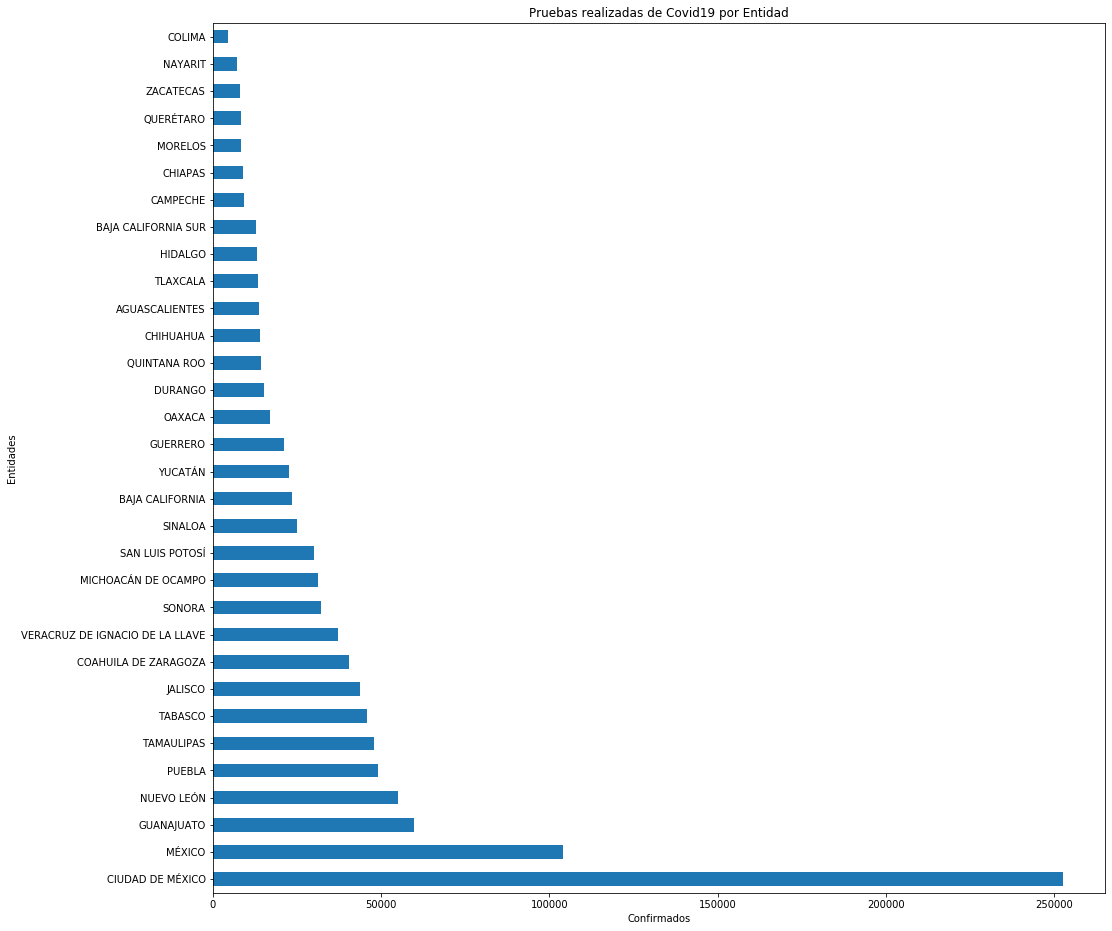

In [14]:
ConteoEntidad.plot(kind='barh', figsize= (16,16))
plt.title('Pruebas realizadas de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')

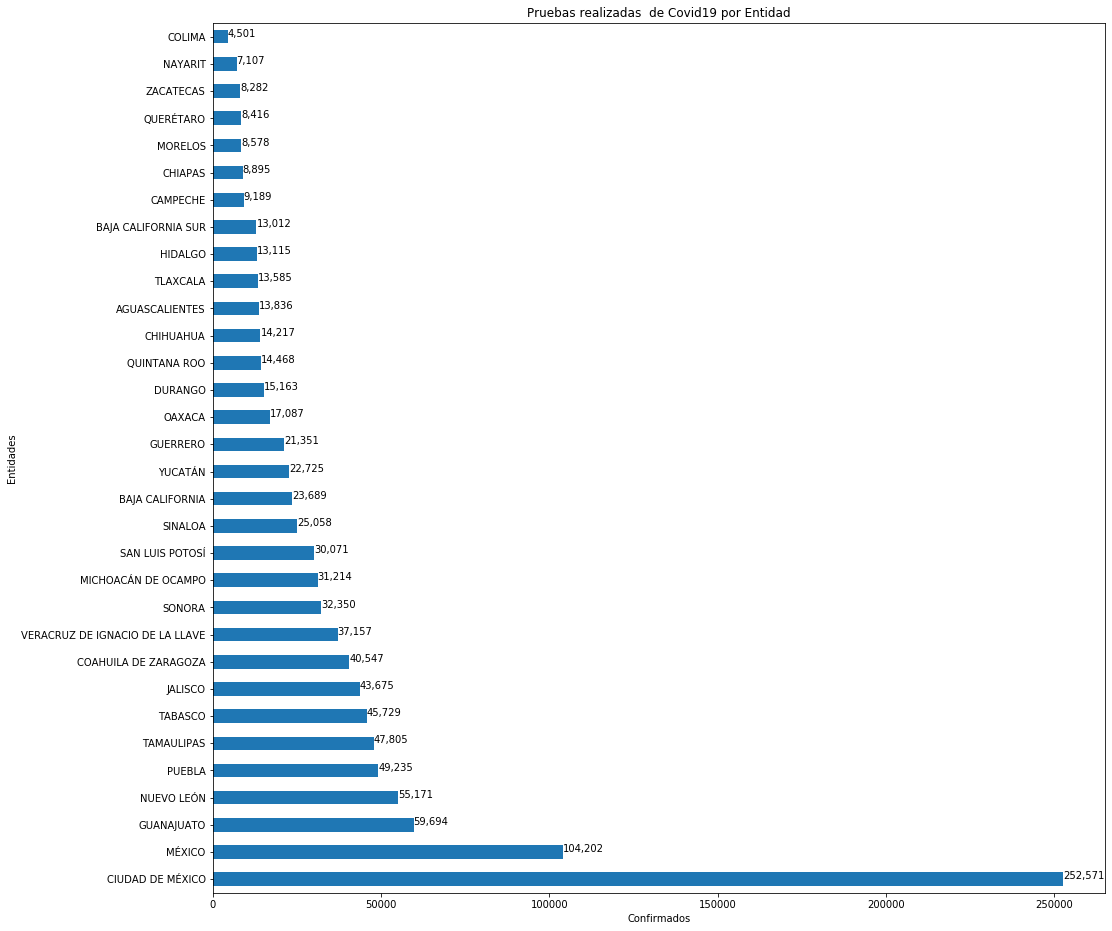

In [15]:
ConteoEntidad.plot(kind='barh', figsize= (16,16))
plt.title('Pruebas realizadas  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(ConteoEntidad):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

In [55]:
confirmadosEntidad = datos.groupby('ESTADO')['RESULTADO'].value_counts()
confirmadosEntidad.head()

ESTADO           RESULTADO
AGUASCALIENTES   2             8941
                 1             4591
                 3              304
BAJA CALIFORNIA  1            14385
                 2             8195
Name: RESULTADO, dtype: int64

In [56]:
confirmadosEntidad = datos.groupby('ESTADO')['RESULTADO'].value_counts().unstack()
confirmadosEntidad.head()

RESULTADO,1,2,3
ESTADO,,,
AGUASCALIENTES,4591,8941,304
BAJA CALIFORNIA,14385,8195,1109
BAJA CALIFORNIA SUR,5451,7089,472
CAMPECHE,5112,3964,113
CHIAPAS,5713,3000,182


In [57]:
confirmadosEntidad.rename(columns={1:'Confirmados'},inplace=True)
confirmadosEntidad.head()

RESULTADO,Confirmados,2,3
ESTADO,,,
AGUASCALIENTES,4591,8941,304
BAJA CALIFORNIA,14385,8195,1109
BAJA CALIFORNIA SUR,5451,7089,472
CAMPECHE,5112,3964,113
CHIAPAS,5713,3000,182


In [58]:
confirmadosEntidad.drop([2,3],axis=1,inplace=True)
confirmadosEntidad.head()

RESULTADO,Confirmados
ESTADO,
AGUASCALIENTES,4591
BAJA CALIFORNIA,14385
BAJA CALIFORNIA SUR,5451
CAMPECHE,5112
CHIAPAS,5713


In [59]:
confirmadosEntidad['Estado'] = confirmadosEntidad.index
confirmadosEntidad.head()

RESULTADO,Confirmados,Estado
ESTADO,,
AGUASCALIENTES,4591,AGUASCALIENTES
BAJA CALIFORNIA,14385,BAJA CALIFORNIA
BAJA CALIFORNIA SUR,5451,BAJA CALIFORNIA SUR
CAMPECHE,5112,CAMPECHE
CHIAPAS,5713,CHIAPAS


In [60]:
confirmadosEntidad.columns.name = None
confirmadosEntidad.head()

,Confirmados,Estado
ESTADO,,
AGUASCALIENTES,4591,AGUASCALIENTES
BAJA CALIFORNIA,14385,BAJA CALIFORNIA
BAJA CALIFORNIA SUR,5451,BAJA CALIFORNIA SUR
CAMPECHE,5112,CAMPECHE
CHIAPAS,5713,CHIAPAS


In [61]:
confirmadosEntidad = confirmadosEntidad.reset_index()
confirmadosEntidad.head()


,ESTADO,Confirmados,Estado
0,AGUASCALIENTES,4591,AGUASCALIENTES
1,BAJA CALIFORNIA,14385,BAJA CALIFORNIA
2,BAJA CALIFORNIA SUR,5451,BAJA CALIFORNIA SUR
3,CAMPECHE,5112,CAMPECHE
4,CHIAPAS,5713,CHIAPAS


In [62]:
confirmadosEntidad = confirmadosEntidad[['Estado','Confirmados']]
confirmadosEntidad.head()

,Estado,Confirmados
0,AGUASCALIENTES,4591
1,BAJA CALIFORNIA,14385
2,BAJA CALIFORNIA SUR,5451
3,CAMPECHE,5112
4,CHIAPAS,5713


In [63]:
confirmadosEntidad.sort_values(by='Confirmados', inplace = True,ascending=False)
#confirmadosEntidad = confirmadosEntidad.set_index('Estado')
confirmadosEntidad = confirmadosEntidad.reset_index()

In [64]:
confirmadosEntidad.head()

,index,Estado,Confirmados
0,6,CIUDAD DE MÉXICO,97308
1,16,MÉXICO,41133
2,26,TABASCO,24523
3,10,GUANAJUATO,24224
4,29,VERACRUZ DE IGNACIO DE LA LLAVE,23313


In [65]:
confirmadosEntidad = confirmadosEntidad[['Estado','Confirmados']]
confirmadosEntidad.head()

,Estado,Confirmados
0,CIUDAD DE MÉXICO,97308
1,MÉXICO,41133
2,TABASCO,24523
3,GUANAJUATO,24224
4,VERACRUZ DE IGNACIO DE LA LLAVE,23313


In [67]:

confirmadoSeries = confirmadosEntidad.copy()
confirmadoSeries = confirmadoSeries.set_index('Estado')
confirmadoSeries = confirmadoSeries.loc[:,'Confirmados']
confirmadoSeries.head()

Estado
CIUDAD DE MÉXICO                   97308
MÉXICO                             41133
TABASCO                            24523
GUANAJUATO                         24224
VERACRUZ DE IGNACIO DE LA LLAVE    23313
Name: Confirmados, dtype: int64

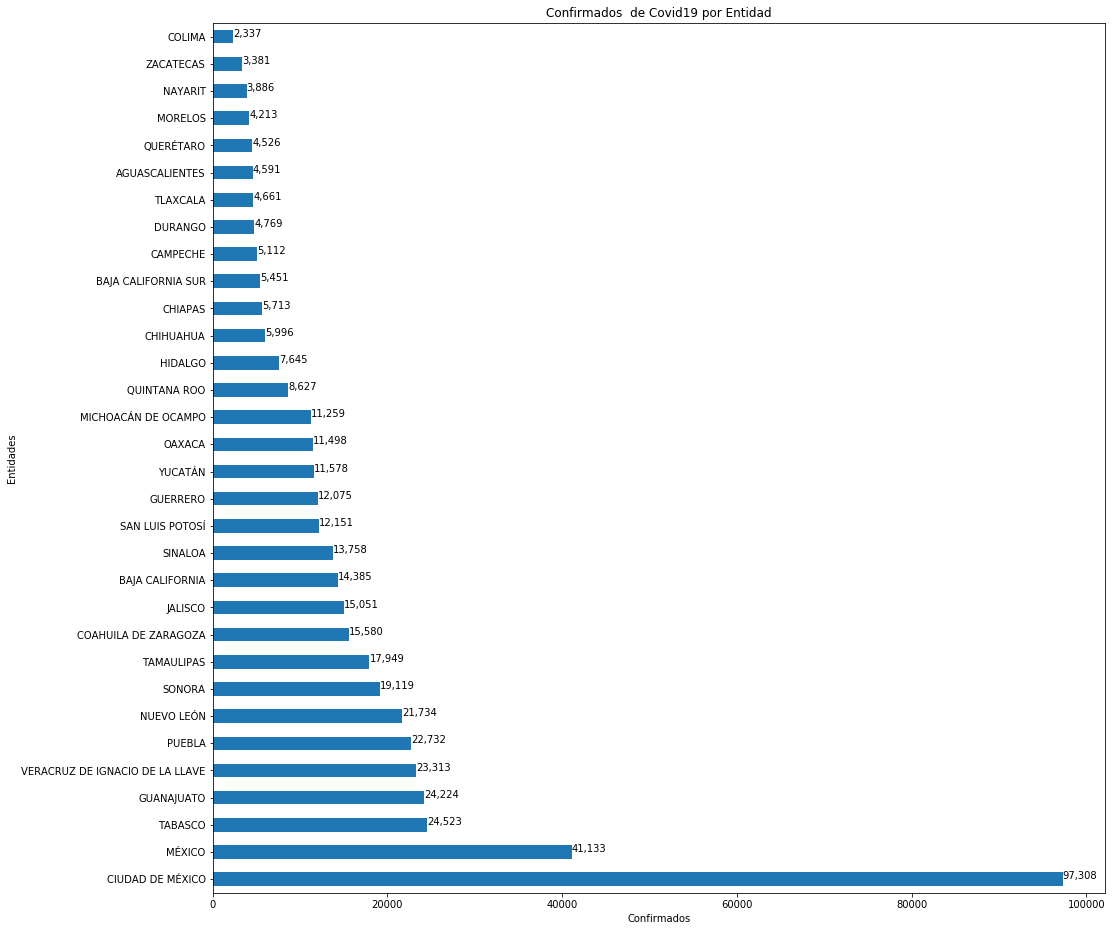

In [68]:

confirmadoSeries.plot(kind='barh', figsize= (16,16))
plt.title('Confirmados  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(confirmadoSeries):
    label = format(value,',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

# Por Fecha

In [147]:
confirmadosEntidad = datos.groupby('ESTADO')['RESULTADO'].value_counts()
confirmadosFecha = datos.groupby('FECHA_INGRESO')['RESULTADO'].value_counts().unstack()
confirmadosFecha.drop(columns=[2,3],inplace=True)

#dataFrameFoko = pd.DataFrame(confirmadosFecha)
confirmadosFecha= confirmadosFecha.dropna()
confirmadosFecha.head()

RESULTADO,1
FECHA_INGRESO,
2020-01-13,1.0
2020-01-29,1.0
2020-02-27,4.0
2020-02-28,2.0
2020-02-29,1.0


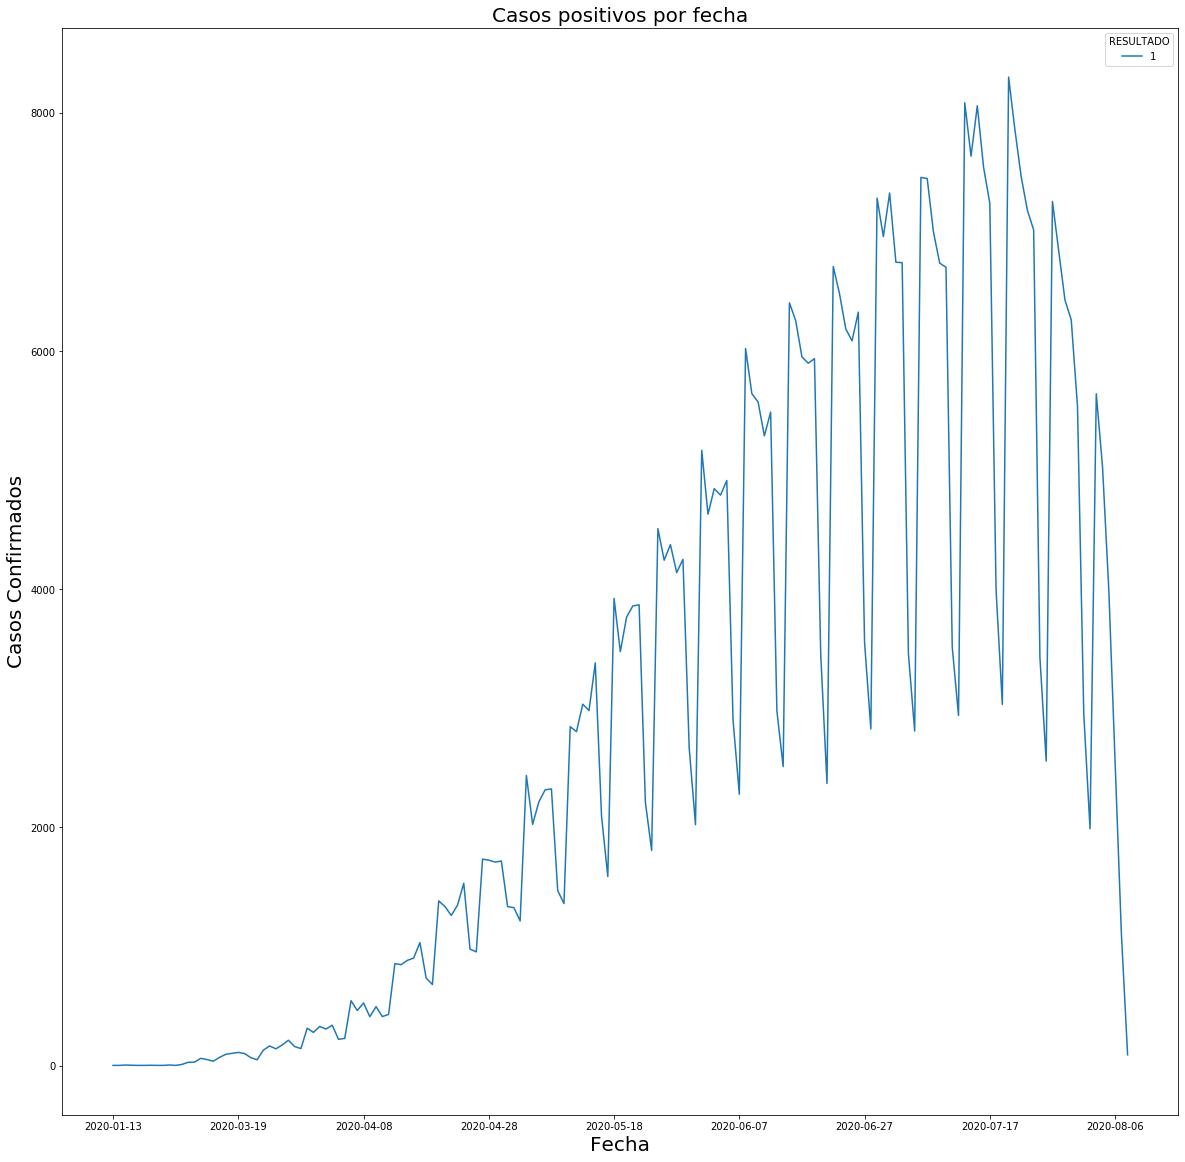

In [148]:
confirmadosFecha.plot(kind='line', figsize= (20,20))
plt.title('Casos positivos por fecha',fontsize=20)
plt.ylabel('Casos Confirmados', fontsize=20)
plt.xlabel('Fecha', fontsize=20)
plt.show()

In [150]:
negativosFecha = datos.groupby('FECHA_INGRESO')['RESULTADO'].value_counts().unstack()
negativosFecha.head()
negativosFecha.drop(columns=[1,3],inplace=True)
negativosFecha = negativosFecha.dropna()

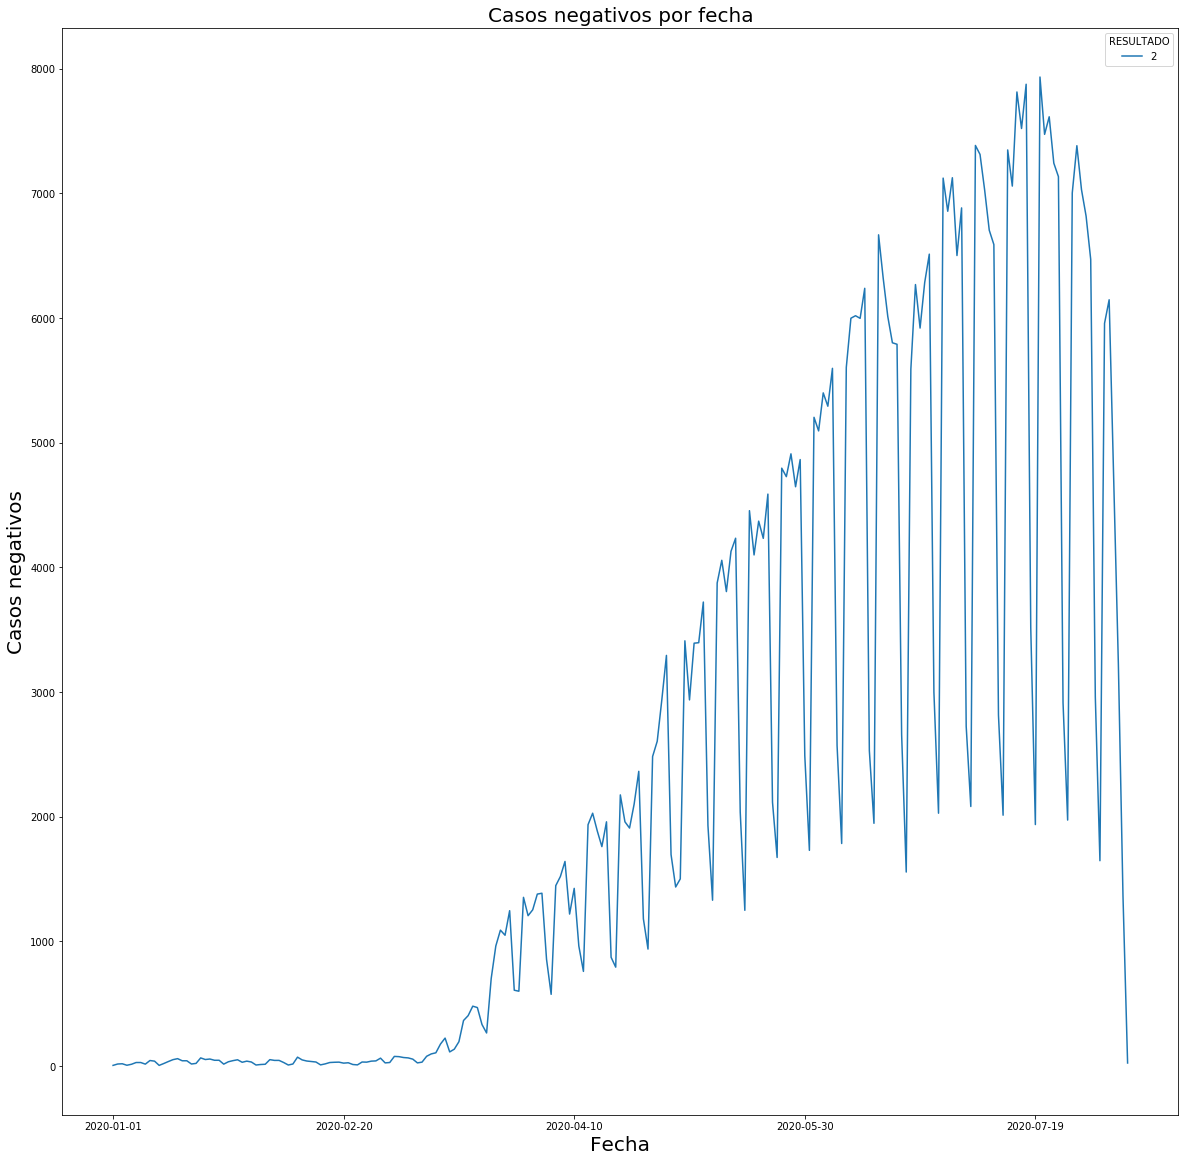

In [151]:
negativosFecha.plot(kind='line', figsize= (20,20))
plt.title('Casos negativos por fecha',fontsize=20)
plt.ylabel('Casos negativos',fontsize=20)
plt.xlabel('Fecha',fontsize=20)
plt.show()

# Pastel


In [154]:
confirmadosSexo = datos.groupby('SEXO')['RESULTADO'].value_counts().unstack()
confirmadosSexo.drop(columns=[2,3],inplace=True)
dfSexoPositivo = pd.DataFrame(confirmadosSexo)
dfSexoPositivo.rename(columns={1:'Confirmados',}, inplace=True)
dfSexoPositivo

RESULTADO,Confirmados
SEXO,
1,225929
2,254349


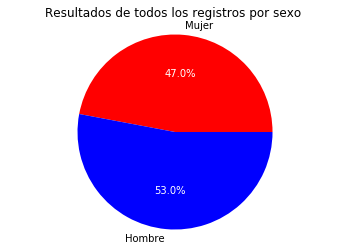

In [153]:
sExo = ('Mujer','Hombre')
slices = (dfSexoPositivo.loc[1,'Confirmados'],dfSexoPositivo.loc[2,'Confirmados'])
colores= ('red', 'blue')
_, _, texto = plt.pie(slices, colors=colores, labels=sExo, autopct='%1.1f%%')

for tex in texto:
    tex.set_color('white')
plt.axis('equal')
plt.title('Resultados de todos los registros por sexo ')
plt.show()


In [177]:
confirmadosMes = datos.copy()
confirmadosMes['Mes_Ingreso'] = confirmadosMes['FECHA_INGRESO'].apply(lambda row: int(row[5:7]))
confirmadosMes = confirmadosMes.groupby('Mes_Ingreso')['RESULTADO'].value_counts().unstack()
confirmadosMes.drop(columns=[2,3],inplace=True)

#confirmadosMes= confirmadosMes.dropna()
confirmadosMes[1] = confirmadosMes[1].fillna(0)

confirmadosMes.columns.name = 'Positivos'
confirmadosMes.head()

Positivos,1
Mes_Ingreso,
1,2
2,7
3,2517
4,26294
5,85843


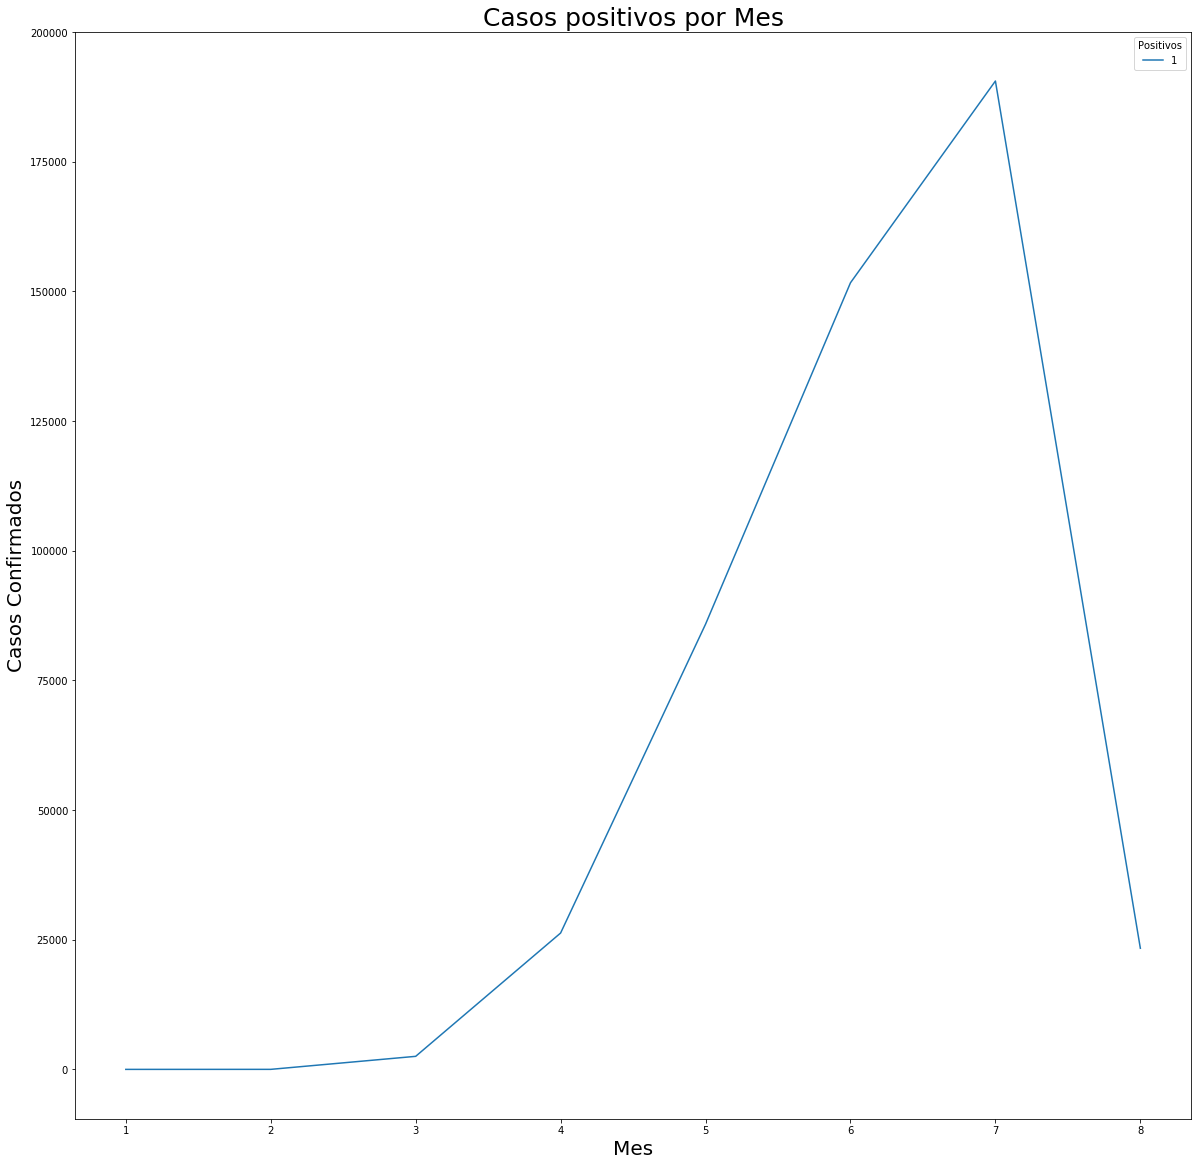

In [178]:
confirmadosMes.plot(kind='line', figsize= (20,20))
plt.title('Casos positivos por Mes',fontsize=25)
plt.ylabel('Casos Confirmados', fontsize=20)
plt.xlabel('Mes', fontsize=20)
plt.show()

In [137]:
datos_correlacion = datos.copy()

In [138]:
muertes_Covid = datos_correlacion[datos_correlacion['Vive']==0]
muertes_Covid = datos_correlacion[datos_correlacion['RESULTADO']==1]

In [139]:
muertes_Covid = muertes_Covid.drop(
    [
        'ORIGEN',
        'SECTOR',
        'ENTIDAD_UM',
        'ENTIDAD_RES',
        'HABLA_LENGUA_INDIG',
        'FECHA_DEF',
        'FECHA_SINTOMAS',
        'TIPO_PACIENTE',
        'PAIS_NACIONALIDAD',
        'PAIS_ORIGEN',
        'MIGRANTE',
        'RESULTADO',
        'NACIONALIDAD',
        'RENAL_CRONICA',
        'OTRO_CASO',
        'ESTADO',
        'Vive',
        'EMBARAZO'
    ],
    axis = 1
)
muertes_Covid.head()

,SEXO,FECHA_INGRESO,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,TABAQUISMO,UCI
0,1,2020-05-18,97,2,63,2,2,2,2,1,2,2,2,2,97
1,2,2020-05-26,97,2,27,2,2,2,2,2,2,2,2,2,97
2,1,2020-04-09,2,2,61,2,2,2,2,1,2,2,2,2,2
3,1,2020-03-23,97,1,27,2,2,2,2,2,2,2,2,2,97
4,2,2020-05-24,1,1,47,2,2,2,2,2,2,2,1,2,2


In [142]:
len(muertes_Covid)

480278

In [140]:
muertes_Covid.describe()

,SEXO,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,TABAQUISMO,UCI
count,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000,480278.000000
mean,1.529587,71.716360,1.799160,45.150883,2.146598,2.256566,2.243998,2.286659,2.088409,2.412557,2.267687,2.093002,2.226904,71.720885
std,0.499124,42.014165,0.509379,16.503149,5.432880,5.105466,5.094008,5.345901,5.260090,6.471378,5.259097,5.202122,5.357974,42.006838
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,97.000000,2.000000,44.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,97.000000,2.000000,56.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
max,2.000000,99.000000,99.000000,118.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000


In [136]:
muertesHombres = muertes_Covid[(muertes_Covid.SEXO==2)]
muertesMUJERES = muertes_Covid[(muertes_Covid.SEXO==1)]

In [ ]:
totalHombres = muertes

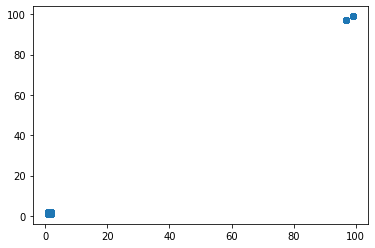

In [143]:
# Code cell 6
%matplotlib inline

plt.scatter(muertesHombres["INTUBADO"], muertesHombres["UCI"])
plt.show()


# Arbol predictivo

In [201]:
training = pd.read_csv('./Data/Covid/200809COVID19MEXICO.csv',encoding="ISO-8859-1")

In [203]:
training['Vive']= training['FECHA_DEF'].apply(lambda current: 1 if current == '9999-99-99' else 0)

In [204]:
def isDeadByCovid(persona):
    vive = persona['Vive']
    resultado = persona['RESULTADO']
    if vive == 0:
        if resultado == 1:
            return 1
        else:
            return 0
    else:
        return 0

In [205]:
training['MuerteCovid'] = training.apply(isDeadByCovid,axis=1)

In [206]:
training = training[(training['INTUBADO']==1) | (training['INTUBADO']==2)]
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive,MuerteCovid
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,99,1,99,MÃ©xico,99,2,1,0
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,2,1,1,99,MÃ©xico,99,2,0,1
5,2020-08-09,177924,2,4,2,2,18,2,2,2,...,2,2,99,1,99,MÃ©xico,99,2,0,1
6,2020-08-09,087e3c,2,4,9,2,9,9,6,2,...,2,1,99,1,99,MÃ©xico,99,2,0,1
7,2020-08-09,022cb3,2,3,2,1,2,2,2,2,...,2,1,2,1,99,MÃ©xico,99,2,1,0


In [207]:
training = training[training['RESULTADO']==1 ]
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive,MuerteCovid
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,99,1,99,MÃ©xico,99,2,1,0
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,2,1,1,99,MÃ©xico,99,2,0,1
5,2020-08-09,177924,2,4,2,2,18,2,2,2,...,2,2,99,1,99,MÃ©xico,99,2,0,1
6,2020-08-09,087e3c,2,4,9,2,9,9,6,2,...,2,1,99,1,99,MÃ©xico,99,2,0,1
7,2020-08-09,022cb3,2,3,2,1,2,2,2,2,...,2,1,2,1,99,MÃ©xico,99,2,1,0


In [208]:
#code cell 8
#create the array for the target values
y_target = training["INTUBADO"].values

In [209]:
#code cell 9
columns = [
        "SEXO","NEUMONIA","EDAD",
        "EMBARAZO","DIABETES",
        "EPOC","ASMA","INMUSUPR",
        "HIPERTENSION","OTRA_COM","CARDIOVASCULAR",
        "OBESIDAD","RENAL_CRONICA","TABAQUISMO",
        "UCI"
    
    ]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [212]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)


#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)


In [213]:
#code cell 11
clf_train.score(X_input,y_target)

0.9125971056258614

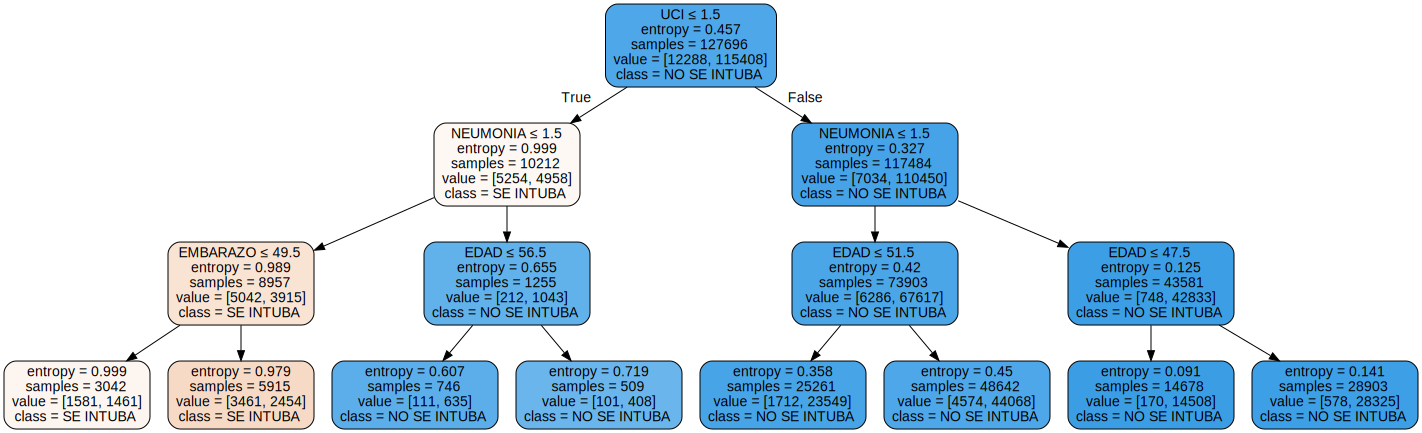

In [214]:
clasificacion = ['SE INTUBA','NO SE INTUBA']
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('COVID0',format='png')
graph


In [215]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1")

In [216]:
testing.drop(columns=['FECHA_ACTUALIZACION','MUNICIPIO_RES','ENTIDAD_NAC','PAIS_NACIONALIDAD'],inplace=True)

In [217]:
testing = testing[(testing['INTUBADO']==1) | (testing['INTUBADO']==2)]
testing.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,2,99,1,99,99,2
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,2,2,1,2,2,1,1,99,99,2
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,2,2,99,1,99,99,2
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,2,2,1,99,1,99,99,2
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,2,2,1,2,1,2,1,99,99,2


In [218]:
testing = testing[testing['RESULTADO']==1 ]
testing.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,2,99,1,99,99,2
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,2,2,1,2,2,1,1,99,99,2
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,2,2,99,1,99,99,2
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,2,2,1,99,1,99,99,2
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,2,2,1,2,1,2,1,99,99,2


In [219]:
X_input = testing[list(columns)].values

In [220]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Intubado':target_labels, 'ID_REGISTRO':testing['ID_REGISTRO']})

#display the first few rows of the data set
target_labels.head()

,Est_Intubado,ID_REGISTRO
2,2,1bf200
4,2,1a1635
5,2,177924
6,2,087e3c
7,2,022cb3


In [221]:
num_Entubados = target_labels[target_labels['Est_Intubado']==1]
num_Entubados

,Est_Intubado,ID_REGISTRO
199,1,077c96
243,1,062a08
281,1,0f822b
332,1,13b414
559,1,0cc8e1
...,...,...
830280,1,0a0971
830281,1,1bb860
830426,1,0cc00a
830531,1,0be892


In [222]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['ID_REGISTRO','INTUBADO']], on=['ID_REGISTRO'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Intubado'] == testing_results['INTUBADO']) / float(len(testing_results))
# Print the result
acc

0.9125971056258614

In [223]:
all_data = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1", usecols=["SEXO","NEUMONIA","EDAD",
    "EMBARAZO","DIABETES",
    "EPOC","ASMA","INMUSUPR",
    "HIPERTENSION","OTRA_COM","CARDIOVASCULAR",
    "OBESIDAD","RENAL_CRONICA","TABAQUISMO",
    "UCI","RESULTADO","INTUBADO"])
#View info for the new dataframe
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,1,97,2,63,2,2,2,2,2,1,2,2,2,2,2,1,97
1,2,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
3,1,97,1,27,2,2,2,2,2,2,2,2,2,2,2,1,97
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2


In [224]:
all_data = all_data[(all_data['INTUBADO']==1) | (all_data['INTUBADO']==2)]
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2
5,2,2,1,51,97,2,2,2,2,2,2,2,2,2,2,1,2
6,2,2,1,52,97,1,2,2,2,2,2,2,2,2,1,1,2
7,1,2,1,64,2,2,2,2,2,1,2,2,1,2,1,1,2


In [225]:
all_data = all_data[all_data['RESULTADO']==1 ]
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2
5,2,2,1,51,97,2,2,2,2,2,2,2,2,2,2,1,2
6,2,2,1,52,97,1,2,2,2,2,2,2,2,2,1,1,2
7,1,2,1,64,2,2,2,2,2,1,2,2,1,2,1,1,2


In [226]:
#Import train_test_split() from the sklearn.model_selection libary 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["INTUBADO"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [227]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [228]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.9130219141965882 Testing score = 0.9124493431742986
